## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

## Import the data as pandas dataframe

In [4]:
df=pd.read_csv('data/stud.csv')

## Preparing X and Y variables

In [6]:
# We will be prediction the writing score so we will keep it as output feature

X=df.drop(columns=['writing_score'],axis=1)
y=df['writing_score']

## Data Transformations

In [8]:
num_features=[feature for feature in X.columns if X[feature].dtypes!='O']
cat_features=[feature for feature in X.columns if X[feature].dtypes=='O']

In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler=StandardScaler()
oh_encoder=OneHotEncoder()


preprocessor=ColumnTransformer(
    [
         ('OneHotEncoder',oh_encoder,cat_features),
         ('StandardScaler',scaler,num_features),
    ]
)

In [10]:
X=preprocessor.fit_transform(X)

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Model Training and Evaluation

In [14]:
def evaluate_model(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    return mae,rmse,r2


In [15]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Nearest Neighbors":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    #Training Model
    model.fit(X_train,y_train)


    #Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    print(' ')
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("Mean Absolute Error: {}".format(model_train_mae))
    print("Root Mean Square Error: {}".format(model_train_rmse))
    print("R2_score: {}".format(model_train_r2))

    print("-----------------------------------")

    print("Model Performance for Test Set")
    print("Mean Absolute Error: {}".format(model_test_mae))
    print("Root Mean Square Error: {}".format(model_test_rmse))
    print("R2_score: {}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*20)
    print('\n')

LinearRegression
 
Model Performance for Training Set
Mean Absolute Error: 2.684790724969181
Root Mean Square Error: 3.3575606698163583
R2_score: 0.9488066237834389
-----------------------------------
Model Performance for Test Set
Mean Absolute Error: 3.1753147283249974
Root Mean Square Error: 3.815893651101136
R2_score: 0.9434652208209913


Lasso
 
Model Performance for Training Set
Mean Absolute Error: 3.6549334982862685
Root Mean Square Error: 4.514321899355755
R2_score: 0.9074554001462553
-----------------------------------
Model Performance for Test Set
Mean Absolute Error: 3.901864199293994
Root Mean Square Error: 4.919992046913302
R2_score: 0.9060164215631767


Ridge
 
Model Performance for Training Set
Mean Absolute Error: 2.6851839652181986
Root Mean Square Error: 3.357614758021004
R2_score: 0.9488049743835415
-----------------------------------
Model Performance for Test Set
Mean Absolute Error: 3.1755178716958534
Root Mean Square Error: 3.8163647019052545
R2_score: 0.943451

## R2 score for test set from different algorithms

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Model Name,R2 score
0,LinearRegression,0.943465
2,Ridge,0.943451
6,XGBRegressor,0.921954
5,Random Forest,0.916821
7,AdaBoostRegressor,0.911328
1,Lasso,0.906016
3,K-Nearest Neighbors,0.882647
4,Decision Tree,0.880059


### Linear Regression has shown the best performance

In [19]:
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is {} %".format(score))

Accuracy of the model is 94.34652208209913 %


### Plotting y_test and y_pred

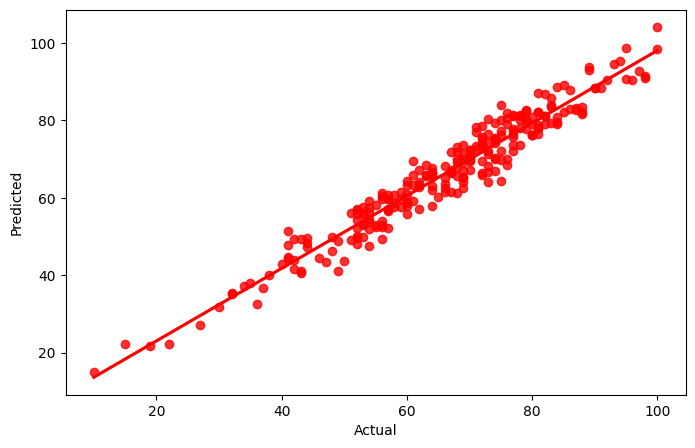

In [45]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Interpretting the coefficients

In [39]:
print(lr.coef_)

[ 2.90802426 -2.90802426 -0.53351459 -0.17096266  0.53527284  1.73607866
 -1.56687425  0.11488591  1.42887336 -1.25055998  1.29033933 -0.13508489
 -1.44845374 -0.14425193  0.14425193  1.76079425 -1.76079425  4.45870099
  9.50060746]
